# Circle Intercepts

#### This script calculates the intercepts of circles given their centroids and radii. 

The intercept formula is

$(x,y) = \frac{1}{2} (x_1 + x_2, y_1+y_2) + \frac{r^2_1 - r^2_2}{2R^2} (x_2-x_1, y_2-y_1) $  
$\pm \sqrt{2 \frac{r^2_1 + r^2_2}{R^2} - \frac{(r^2_1 - r^2_2)^2}{R^4} -1} (y_2-y_1, x_1-x_2) $

### Imports & Constants

In [7]:
import numpy as np
test_array = [1,2,3,4,5,6,7,8,9,10]

for i in range(1000):
    r = np.random.randint(1,9)
    test_array = test_array[r:] + test_array[:r]

print(test_array)

[8, 9, 10, 1, 2, 3, 4, 5, 6, 7]


In [1]:
import matplotlib.pyplot as plt

### Functions

In [2]:
def vectorize(n):
    x = [i[0] for i in n]
    y = [i[1] for i in n]
    return x, y

def plot_circles(ax, point_1, point_2, r1, r2, xrang, yrang):
    x,y = vectorize(([point_1, point_2]))
    circ1 = plt.Circle(point_1, r1, fill=False)
    circ2 = plt.Circle(point_2, r2, fill=False)
    ax.add_artist(circ1)
    ax.add_artist(circ2)
    ax.scatter(x,y)
    ax.set_ylim(min(xrang), max(xrang))
    ax.set_xlim(min(yrang), max(yrang))
    return ax

def euclid_d(a, b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

def intersect_circ(a, b, r1, r2, d):
    coord = lambda z1, z2, r1, r2, d: (1/2)*(z1+z2) + ((r1**2 - r2**2)/(2*d**2)) * (z2-z1)
    offset = 0.5 * (2 * (r1**2 + r2**2)/d**2 - (r1**2-r2**2)**2 / d**4 -1)**0.5
    y_o = offset * (b[0]-a[0])
    x_o = offset * (a[1]-b[1])
    x = coord(a[0], b[0], r1, r2, d)
    y = coord(a[1], b[1], r1, r2, d)
    coords = [[x+x_o, y+y_o], [x-x_o, y-y_o]]
    return coords

### Data Sample

In [3]:
# point_1 = [2,4]
# point_2 = [3,2]
# r1 = 2
# r2 = 1.5


point_1 = [-88.8278, 30.4113] # Ocean Springs, MS
point_2 = [-77.4874, 39.0438] # Ashburn, VA
r1 = 8
r2 = 7


## Computation

In [4]:
D = euclid_d(point_1, point_2)
coords = intersect_circ(point_1, point_2, r1, r2, D)
X, Y = vectorize(coords)

### Results Plot

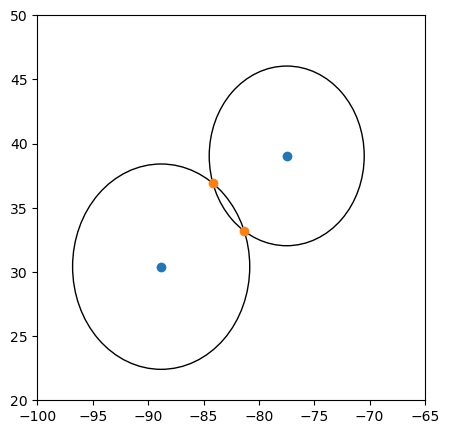

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
plot_circles(ax, point_1, point_2, r1, r2, [20, 50], [-100, -65])
ax.scatter(X,Y)